In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import animation, rc
from matplotlib.colors import TwoSlopeNorm
from lbow.oneDimensional.steadystate import HalfPlaneModel

In [3]:
rc('animation', html='html5')

In [4]:
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize']  = 16
mpl.rcParams['axes.titlesize']  = 16

# Mountain wave as seen from a moving frame of reference

Stationary flow with uniform velocity and linear stratification over the Witch of Agnesi hill, as seen from a reference frame moving with the flow. The flow solution is obtained with LBoW, which solves linear theory of buoyancy waves.

Created by Dries Allaerts, 2024

Licensed under the Apache License, Version 2.0.

## Set-up

### Input parameters

Flow parameters: wind speed U and Brunt Vaisala frequency N

In [5]:
U = 10   # Wind speed [m/s]
N = 0.01 # Brunt-Vaisala frequency [1/s]

Hill shape $h\left(x\right) = \large\frac{h_{max}}{1+\left(\frac{x}{L}\right)^2}$


In [6]:
L = 1000.0   # Characteristic width of the hill [m]
hmax = 100.0 # Height of the hill [m]

# Shape function of the hill
h = lambda x: hmax/(1+(x/L)**2)

Numerical parameters

In [7]:
Lx = 2000.0e3 # Horizonal length of the numerical domain [m]
Nx = int(2e4) # Number of grid points

Parameters for visualization

In [8]:
Lz = 15.0e3 # Height up to which solution is calculated [m]
Nz = 151    # Number of vertical levels to be used

### Numerical grid

In [9]:
xs,dx = np.linspace(-Lx/2,Lx/2,Nx,endpoint=False,retstep=True)
print('Horizontal grid resolution is {} m'.format(dx))

Horizontal grid resolution is 100.0 m


In [10]:
zs,dz = np.linspace(0,Lz,Nz,retstep=True)
print('Vertical resolution is {} m'.format(dz))

Vertical resolution is 100.0 m


### Model

In [11]:
model = HalfPlaneModel(xs,h(xs),U,N)

## Solve flow problem

In [12]:
%time w = model.solve('w',zs)

CPU times: user 305 ms, sys: 61.9 ms, total: 367 ms
Wall time: 199 ms


## Visualization

### Picture of stationary gravity waves in a fixed reference frame

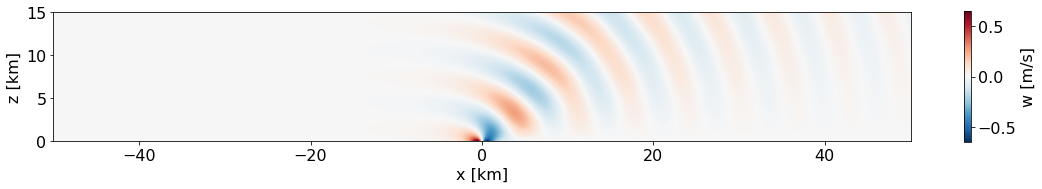

In [13]:
f,ax=plt.subplots(1,1,figsize=(19.2,4.8))

# Plot vertical velocity
im=ax.imshow(w.T,
             origin='lower',
             extent=[xs[0]/1e3, xs[-1]/1e3, zs[0]/1e3, zs[-1]/1e3],
             aspect='equal',
             cmap='RdBu_r',
             norm=TwoSlopeNorm(vcenter=0.))

# figure mark-up
cbar = f.colorbar(im,ax=ax,shrink=0.5,label='w [m/s]')
_ = ax.set(xlim=[-50,50],ylim=[0,15],xlabel='x [km]',ylabel='z [km]')

### Movie of gravity wave showing both fixed and moving reference frame

Low resolution video for inside this notebook

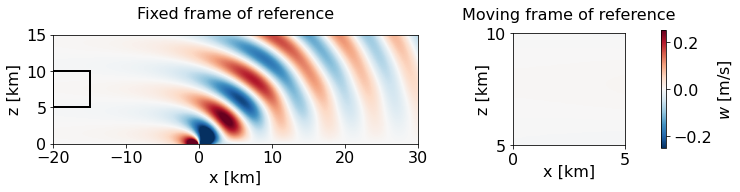

In [14]:
f,ax=plt.subplots(1,2,figsize=(12.8,4.8),gridspec_kw={'width_ratios': [3.25, 1]})
plt.subplots_adjust(wspace=0.4)

# Stationary plot
im=ax[0].imshow(w.T,
             origin='lower',
             extent=[xs[0]/1e3, xs[-1]/1e3, zs[0]/1e3, zs[-1]/1e3],
             aspect='equal',
             cmap='RdBu_r',
             norm=TwoSlopeNorm(vcenter=0.,vmin=-0.25,vmax=0.25))

_ = ax[0].set(xlim=[-20,30],
              ylim=[0,15],
              xlabel='x [km]',
              ylabel='z [km]')

ax[0].set_title('Fixed frame of reference', y=1.0, pad=16)

# Animated plot
istart = 9800
kstart=50
frames = range(0,451,5)
wslice = w[istart:istart+50,kstart:kstart+50]
cax = ax[1].imshow(wslice.T,
             origin='lower',
             extent=[xs[istart]/1e3, xs[istart+50]/1e3, zs[kstart]/1e3, zs[kstart+50]/1e3],
             aspect='equal',
             cmap='RdBu_r',
             norm=TwoSlopeNorm(vcenter=0.,vmin=-0.25,vmax=0.25))

patch = patches.Rectangle((xs[istart]/1e3, zs[kstart]/1e3), 5, 5, ec='k',fc='none',lw=2)
ax[0].add_patch(patch)

cbar = f.colorbar(cax,ax=ax,shrink=0.45,label=r'$w$ [m/s]')
_ = ax[1].set(xticks=[-20,-15],
              xticklabels=['0','5'],
              yticks=[5,10])

ax[1].set_xlabel('x [km]',labelpad=-3)
ax[1].set_ylabel('z [km]',labelpad=-5)
ax[1].set_title('Moving frame of reference', y=1.0, pad=14)

def animate(i):
    wslice = w[istart+i:istart+i+50,kstart:kstart+50]
    cax.set_array(wslice.T)
    patch.set_xy([xs[istart+i]/1e3, zs[kstart]/1e3])

anim = animation.FuncAnimation(f, animate, interval=100, frames=frames)

In [15]:
anim

Create high-resolution video

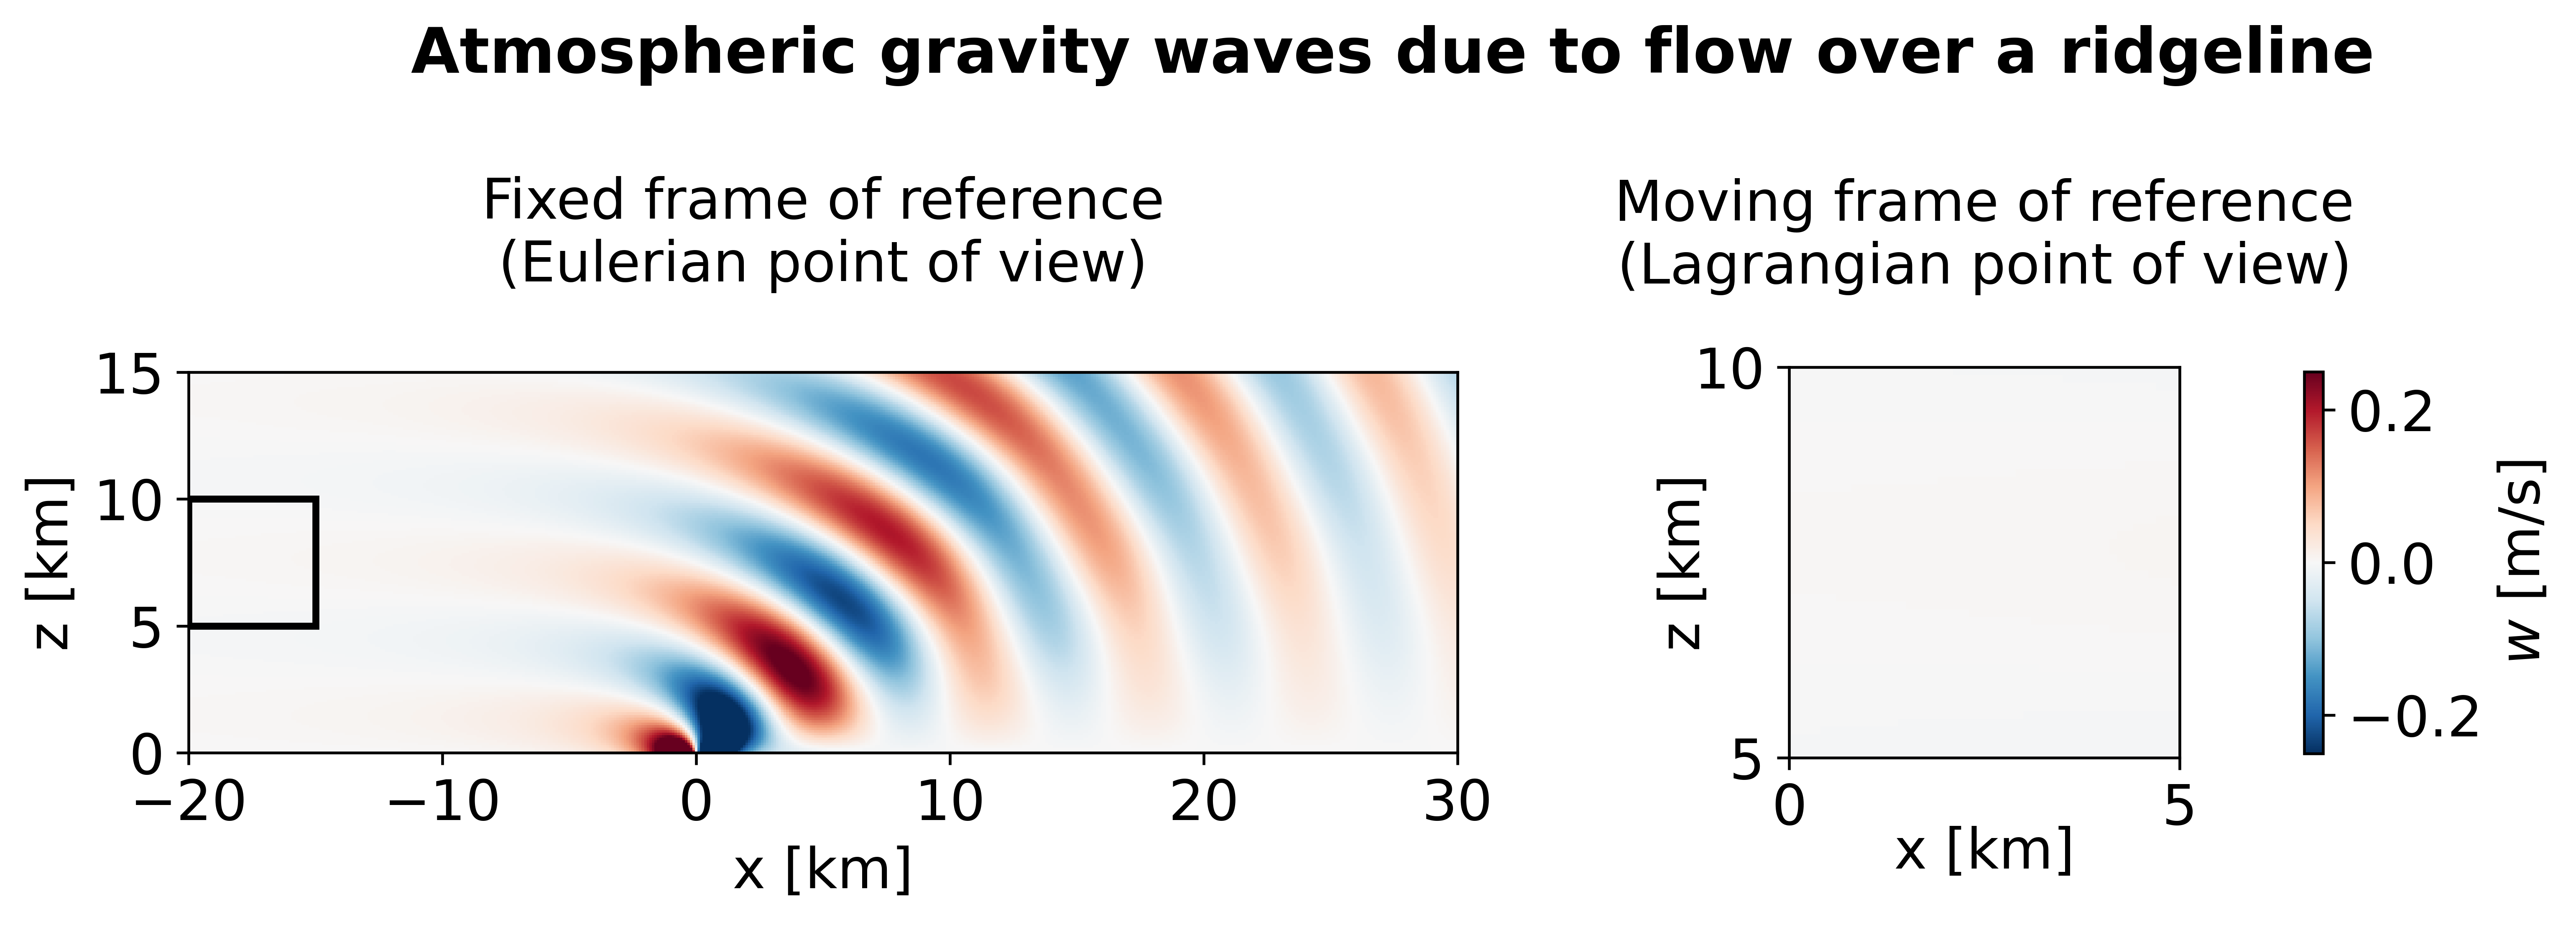

In [16]:
f,ax=plt.subplots(1,2,figsize=(12.8,7.2),gridspec_kw={'width_ratios': [3.25, 1]},dpi=600,facecolor=None)
plt.subplots_adjust(wspace=0.4)

# Stationary plot
im=ax[0].imshow(w.T,
             origin='lower',
             extent=[xs[0]/1e3, xs[-1]/1e3, zs[0]/1e3, zs[-1]/1e3],
             aspect='equal',
             cmap='RdBu_r',
             norm=TwoSlopeNorm(vcenter=0.,vmin=-0.25,vmax=0.25))

_ = ax[0].set(xlim=[-20,30],
              ylim=[0,15],
              xlabel='x [km]',
              ylabel='z [km]')

ax[0].set_title('Fixed frame of reference\n(Eulerian point of view)', y=1.0, pad=26)

# Animated plot
istart = 9800
kstart=50
frames = range(0,451,5)
wslice = w[istart:istart+50,kstart:kstart+50]
cax = ax[1].imshow(wslice.T,
             origin='lower',
             extent=[xs[istart]/1e3, xs[istart+50]/1e3, zs[kstart]/1e3, zs[kstart+50]/1e3],
             aspect='equal',
             cmap='RdBu_r',
             norm=TwoSlopeNorm(vcenter=0.,vmin=-0.25,vmax=0.25))

patch = patches.Rectangle((xs[istart]/1e3, zs[kstart]/1e3), 5, 5, ec='k',fc='none',lw=2)
ax[0].add_patch(patch)

cbar = f.colorbar(cax,ax=ax,shrink=0.28,label=r'$w$ [m/s]')
_ = ax[1].set(xticks=[-20,-15],
              xticklabels=['0','5'],
              yticks=[5,10])

ax[1].set_xlabel('x [km]',labelpad=-3)
ax[1].set_ylabel('z [km]',labelpad=-5)
ax[1].set_title('Moving frame of reference\n(Lagrangian point of view)', y=1.0, pad=24)

f.suptitle('Atmospheric gravity waves due to flow over a ridgeline',y=0.8,fontsize=18,weight='bold')

def animate(i):
    wslice = w[istart+i:istart+i+50,kstart:kstart+50]
    cax.set_array(wslice.T)
    patch.set_xy([xs[istart+i]/1e3, zs[kstart]/1e3])

anim = animation.FuncAnimation(f, animate, interval=100, frames=frames)

In [17]:
%%time
anim.save('AGW_movingRefFrame.mp4', fps=10,
          bitrate=600,
          dpi=600,
          savefig_kwargs={'transparent': True, 'facecolor': 'none'},
          extra_args=['-vcodec', 'libx264'])

CPU times: user 1min 16s, sys: 16.6 s, total: 1min 33s
Wall time: 2min 2s


### Some other visualizations

Plot of snapshots in time in the moving frame of reference

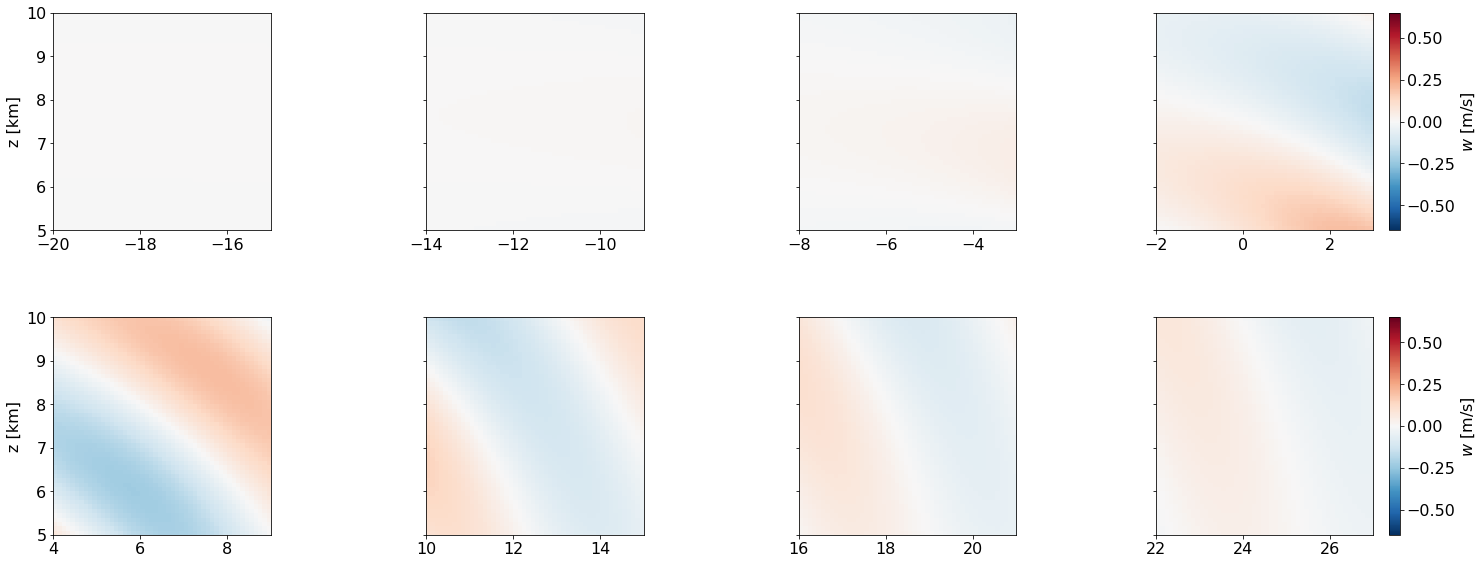

In [18]:
xindices = [9800,9860,9920,9980,10040,10100,10160,10220]
f,ax=plt.subplots(2,int(len(xindices)/2),sharey=True,figsize=(6.4*len(xindices)/2,9.6))
f.subplots_adjust(hspace=0.4)
ax = ax.ravel()

# Plot snapshots
for axi,istart in enumerate(xindices):
    kstart = 50
    wslice = w[istart:istart+50,kstart:kstart+50]
    im=ax[axi].imshow(wslice.T,
             origin='lower',
             extent=[xs[istart]/1e3, xs[istart+50]/1e3, zs[kstart]/1e3, zs[kstart+50]/1e3],
             aspect='equal',
             cmap='RdBu_r',
             norm=TwoSlopeNorm(vcenter=0.,vmin=-0.65,vmax=0.65))
    #_ = ax[axi].set(xlim=[-25,25],ylim=[0,15],xlabel='x [km]',title='t = {:5.1f} min'.format(ts[tindex]/60))
cbar = f.colorbar(im,ax=ax[-1],shrink=1.0,label=r'$w$ [m/s]')
cbar = f.colorbar(im,ax=ax[int(len(xindices)/2)-1],shrink=1.0,label=r'$w$ [m/s]')
_ = ax[0].set(ylabel='z [km]')
_ = ax[int(len(xindices)/2)].set(ylabel='z [km]')

Movie of gravity wave in a moving frame of reference (without the stationary picture)

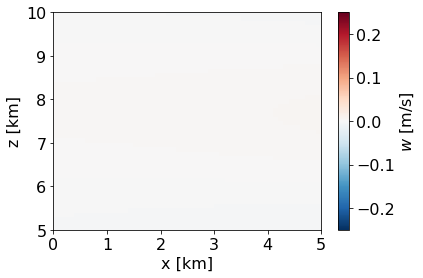

In [19]:
istart = 9800
kstart=50
frames = range(0,601,10)
f, ax = plt.subplots()
wslice = w[istart:istart+50,kstart:kstart+50]
cax = ax.imshow(wslice.T,
             origin='lower',
             extent=[xs[istart]/1e3, xs[istart+50]/1e3, zs[kstart]/1e3, zs[kstart+50]/1e3],
             aspect='auto',
             cmap='RdBu_r',
             norm=TwoSlopeNorm(vcenter=0.,vmin=-0.25,vmax=0.25))
cbar = f.colorbar(cax,ax=ax,shrink=1.0,label=r'$w$ [m/s]')
_ = ax.set(xticks=[-20,-19,-18,-17,-16,-15],xticklabels=['0','1','2','3','4','5'],xlabel='x [km]',ylabel='z [km]')

def animate(i):
    wslice = w[istart+i:istart+i+50,kstart:kstart+50]
    cax.set_array(wslice.T)

anim2 = animation.FuncAnimation(f, animate, interval=200, frames=frames)

In [20]:
anim2